In [1]:
# lib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# technical analysis
import ta

## data: 5 minutes data

In [2]:
df_ = pd.read_csv('C:ethusd5min.csv')
df = df_.set_index('timestamp')
df.index = pd.to_datetime(df.index)
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-04-10 00:00:00,169.56,169.72,169.41,169.43,2906.41820,1586477099999,4.930542e+05,707,2260.79119,3.835677e+05,0
2020-04-10 00:05:00,169.44,169.59,168.92,169.22,3376.45186,1586477399999,5.711061e+05,1004,1951.63764,3.301054e+05,0
2020-04-10 00:10:00,169.23,169.42,168.70,168.78,3007.20677,1586477699999,5.081008e+05,752,929.71120,1.571687e+05,0
2020-04-10 00:15:00,168.84,169.12,168.80,169.00,1465.81110,1586477999999,2.476386e+05,472,637.17163,1.076405e+05,0
2020-04-10 00:20:00,168.99,169.40,168.96,169.36,1067.16710,1586478299999,1.806507e+05,418,343.42918,5.811992e+04,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,2066.80,2069.36,2065.89,2067.74,696.35201,1618011899999,1.439804e+06,1078,350.52749,7.246912e+05,0
2021-04-09 23:45:00,2067.75,2070.85,2067.62,2070.42,1039.88778,1618012199999,2.152313e+06,1344,554.96546,1.148618e+06,0
2021-04-09 23:50:00,2070.42,2070.95,2069.05,2069.52,773.88383,1618012499999,1.601904e+06,1142,428.07969,8.860856e+05,0


In [3]:
close = pd.to_numeric(df.close)

### Benchmark
- return every 1 day (daily returns)

In [4]:
rets_b = close.iloc[::12*24].pct_change().dropna()

In [5]:
rets_b

timestamp
2020-04-11 00:00:00   -0.064865
2020-04-12 00:00:00    0.003408
2020-04-13 00:00:00   -0.012391
2020-04-14 00:00:00    0.002739
2020-04-15 00:00:00   -0.003430
                         ...   
2021-04-05 14:35:00    0.015163
2021-04-06 14:35:00   -0.018137
2021-04-07 14:35:00   -0.033357
2021-04-08 14:35:00    0.019816
2021-04-09 14:35:00    0.009733
Name: close, Length: 364, dtype: float64

In [6]:
rets_b.describe()

count    364.000000
mean       0.007912
std        0.045216
min       -0.158700
25%       -0.013237
50%        0.005597
75%        0.028022
max        0.180893
Name: close, dtype: float64

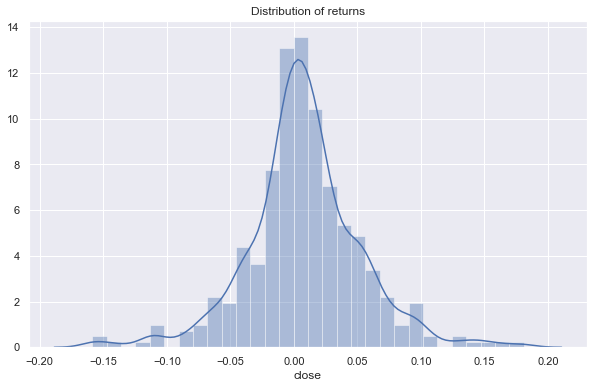

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(rets_b)
plt.title('Distribution of returns')
plt.show()

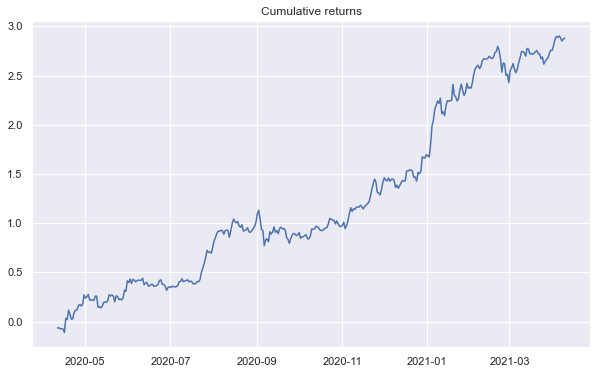

In [8]:
plt.figure(figsize=(10,6))
plt.plot(rets_b.cumsum())
plt.title('Cumulative returns')
plt.show()

In [9]:
SR = rets_b.mean()/rets_b.std()
ASR = SR * np.sqrt(len(rets_b))
print('Ann Sharpe Ratio: ',ASR)

Ann Sharpe Ratio:  3.338377251222563
